##### Document created by : Marcos Cifuentes mrmacisu@hotmail.com

<a href="https://cognitiveclass.ai"><img src = "https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-DS0701EN-SkillsNetwork/labs_v1/IDSNlogo.png" width = 400> </a>

<h1 align=center></h1>


# Data Science Capstone: The Best and safest Neighborhood in San Francisco for Opening a Coffee Shop

## Table of Contents



1. Introduction
    
    1.1: Business Problem

    1.2: Target Audience


2. Data and libraries

3. Methodology 
        
4. Objectives        

5. Approach

6. Initial Section / Variables: Libraries and Variables - General Declaration

7. Crime Rate in San Francisco Section
        
    Part 7.1: Load Incidents: Source: Police Department since 2018 to present.

    Part 7.2: Clean Data Incidents

    Part 7.3: Creation Table's temporal for processing

    Part 7.4: Display Crime rate in San Francisco, by Neigborhood

    Part 7.5: Display Crime rate by Districts in San Francisco - Plot graphics

    Part 7.6: Conclusion Crime rate by Districts in San Francisco


8. Part Data Set with locations of businesses 

    Part 8.1: Load Json Data from Url with dataset includes the locations of businesses     

    Part 8.2: Transform Json Data into Dataframe

    Part 8.3: Cleaning and evaluation for initial dataset

    Part 8.4: Check Neighborhoods, grouping and counting

    Part 8.5  Neighborhoods filtered according to district

    Part 8.6: Visualize neighborhoods with Interactive Map and Plot Graphic

    Part 8.7:  Segment Safest  Neighborhoods with their Venues

    Part 8.8  We only takes the Safest Neighborhoods by Park and Richmond Districts.

    Part 8.9: Top 5 venues and their category an frequency in each neighborhood

    Part 8.10:  Clustering Brooklyn Neighborhoods

    Part 8.11:  Examine clusters 

9. Conclusion and Results     
   

    

## 1. Introduction

(Data initial by wikipedia)

California has a population of 39.5 million people (est. 2019) making it the most populous U.S. state.
The state capital is Sacramento; the largest city is Los Angeles. Other major cities are San Francisco, San Diego, San Jose, and Long Beach.
San Francisco is a cultural, commercial, and financial center in Northern California. San Francisco is the 16th most populous city in the United States, and the fourth most populous in California, with 881,549 residents as of 2019.
It covers an area of about 46.89 square miles (121.4 square kilometers),mostly at the north end of the San Francisco Peninsula in the San Francisco Bay Area, making it the second most densely populated large U.S. city, and the fifth most densely populated U.S. county, behind only four of the five New York City boroughs.

With its diverse culture , comes diverse alternatives business relationship with food items,beverages and cafe in safest Neighborhoods.
So as part of this project , we will list and visualize all options to create "businnes altenative safest" relations with cafe in San Francisco (CA).


This document contains  some basic assumptions, data sets, and analysis that can inform your decision when selecting the optimal neighborhood in San Francisco for opening a coffee shop.

### 1.1. Business Problem

    As a business idea, the goal is to open a coffee shop in a safe and central place in san francisco. Based on data science and data provided by the police department along with current business locations, optimal recommendations should be indicated to a set of investors before opening stores.

### 1.2. Target Audience

    Anyone who wants to buy or build a  coffee shop in San Francisco, or anyone in San Francisco just looking for a nice area to take a cup of coffee.


## 2. Data and libraries


To retrieve information we need two dataset's for San Francisco:  Crime Data and Registered Business Data.both using from the https://datasf.org/academy/

1- For Crime Rate in San Francisco Section [San Francisco Crime Data]

https://data.sfgov.org/Public-Safety/Police-Department-Incident-Reports-2018-to-Present/wg3w-h783

pd.read_csv('Police_Department_Incident_Reports__2018_to_Present2.csv')

2- For Data Set with locations of businesses [San Francisco Registered Business Data]

with urllib.request.urlopen("https://data.sfgov.org/resource/wg3w-h783.json") as url:francisco = json.loads(url.read().decode())


3- Foursquare Data

The Places API offers real-time access to Foursquare’s global database of rich venue data and user content to power your location-based experiences in your app or website.


4- geopy 

python-geoip is a library that provides access to GeoIP databases. Currently it only supports accessing MaxMind databases. 

5- folium

Folium is a Python library used for visualizing geospatial data. It is easy to use and yet a powerful library. Folium is a Python wrapper for Leaflet.js which is a leading open-source JavaScript library for plotting interactive maps.




## 3.Methodology 




### General Overview
On the graph in the lower section we can see the main steps executed with breve descriptions.

To start we will pull all of San Francisco’s crime data reported since 2018 until present in the police department (https://data.sfgov.org/Public-Safety/Police-Department-Incident-Reports-2018-to-Present/wg3w-h783). 
The goal is filter venues safest to open a coffee shop.
Next, we are going to retrieve business registered in San Francisco recently. 

In the two previous data sets, for each one we are going to clean data, remove duplicates, represent and leave unique sets of unrepeatable datos. As a result, we must to merge in one dataset with the safest venues optimal to develop business.

For each neighborhood we will find the closest venues locations using "api.foursquare.com" (cood. Lat and Long.). 
As a result, we will save a dataframe with each Neighborhood and 100 closert places to 500 meters. Next, We will to grouped Neighborhood clasifying each caterogry of venues, looing top 5 venues and visualizing the representation.

Next , we will clustering neighborhood and applying  elbow method. Taking the best candidate "k" we will execute Kmeans.

finally we will show the label's clustering and the conclusions



## Table of Contents


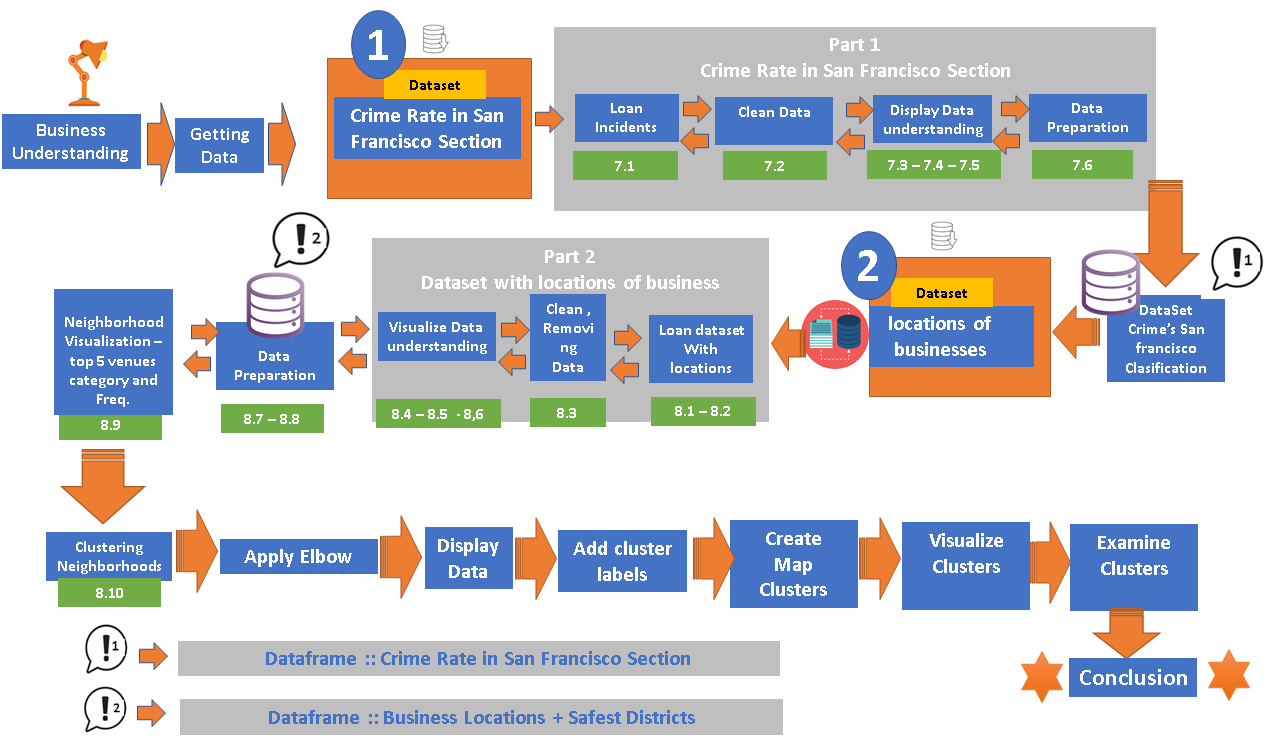

## 4. Objectives

This document contains  some basic assumptions, data sets, and analysis that can inform your decision when selecting the optimal neighborhood in San Francisco for opening a coffee shop.

### Questions that can be asked using the above mentioned datasets

- Which all areas have more number of coffee shops or café ? 
- Which all areas have less number of coffeeshops? 
- Which districts have the neighborhoods safest ?
- Which districts Reveals The Most Unsafe Neighborhoods ?


## 5. Approach

A) We can pull two datasets:
a) list of every business registered in San Francisco from the last couple of decades from the data SF website. 
b) a list of date crime in San francisco (since 2018 - present)

B) Using FourSquare API to find all venues for each safe neighborhood.

C) Filter out all venues that are nearby by locality.

D) Using aggregative rating for each Coffee Shop to find the best places.

E) Visualize the Ranking of neighborhoods using folium library(python)

f) Apply Kmeans to find best candidates to open a new coffee shop!



### 6. Initial Section / Variables: Libraries and Variables - General Declaration


Before we get the data and start exploring it, let's download all the dependencies that we will need.


In [1]:
# Import relevant libraries
import requests # handle requests
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt
from matplotlib import style
import random # random number generation

!pip install geopy
from geopy.geocoders import Nominatim # convert address into latitude and longitude

# libraries for displaying images
from IPython.display import Image 
from IPython.core.display import HTML 
    
# tranforming json file into a pandas dataframe library
import urllib.request 
import json # library to handle JSON files
from pandas.io.json import json_normalize # tranform JSON file into a pandas dataframe

!pip install folium
import folium
from folium import plugins 

from IPython.display import display


pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

import matplotlib.cm as cm
import matplotlib.colors as colors

# Import k-means from clustering
from sklearn.cluster import KMeans

### Part 7.1: Load Incidents: Source: Police Department since 2018 to present.

In [2]:
df_incidents = pd.read_csv('Police_Department_Incident_Reports__2018_to_Present2.csv')

In [3]:
df_incidents.shape

(481988, 34)

We have 481.988 incidents

Let's find out how many entries there are in our dataset.

In [4]:
df_incidents.head(4)

df_incidents.shape

(481988, 34)

### Part 7.2: Clean Data Incidents

<h3 id="identify_handle_missing_values">Identify and handle missing values df_incidents</h3>

#### Convert "?" to NaN

In [5]:
# replace "?" to NaN
df=df_incidents.replace("?", np.nan, inplace = True)

print(df)

None


#### Evaluating for Missing Data

In [7]:
missing_data = df_incidents.isnull()
missing_data.head(5)

,Incident Datetime,Incident Date,Incident Time,Incident Year,Incident Day of Week,Report Datetime,Row ID,Incident ID,Incident Number,CAD Number,Report Type Code,Report Type Description,Filed Online,Incident Code,Incident Category,Incident Subcategory,Incident Description,Resolution,Intersection,CNN,PdDistrict,Analysis Neighborhood,Supervisor District,Latitude,Longitude,Point,Neighborhoods,ESNCAG - Boundary File,Central Market/Tenderloin Boundary Polygon - Updated,Civic Center Harm Reduction Project Boundary,HSOC Zones as of 2018-06-05,Invest In Neighborhoods (IIN) Areas,Current Supervisor Districts,Current Police Districts
0,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,True,True,True,True,False,False
1,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,True,True,False,True,True,True,True,True,True,True,True,True,True,True,True,True
2,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,True,True,False,True,True,True,True,True,True,True,True,True,True,True,True,True
3,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,True,True,False,True,True,True,True,True,True,True,True,True,True,True,True,True
4,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,True,True,False,True,True,True,True,True,True,True,True,True,True,True,True,True


"True" stands for missing value, while "False" stands for not missing value.

Now, We will going to clean data for Latitude and Longitude records

In [8]:
#df_incidents=df_incidents.dropna(inplace=True)
#checking total errors by fields
df_incidents.isnull().sum()

Incident Datetime                                            0
Incident Date                                                0
Incident Time                                                0
Incident Year                                                0
Incident Day of Week                                         0
Report Datetime                                              0
Row ID                                                       0
Incident ID                                                  0
Incident Number                                              0
CAD Number                                              105555
Report Type Code                                             0
Report Type Description                                      0
Filed Online                                            385523
Incident Code                                                0
Incident Category                                          406
Incident Subcategory                                   

In [9]:
## clean latitude and longitud records 

In [10]:
df_incidents['Latitude'].fillna(df_incidents['Latitude'].mode()[0], inplace = True)

df_incidents.isnull().any().any()

df_incidents['Longitude'].fillna(df_incidents['Longitude'].mode()[0], inplace = True)

df_incidents.isnull().any().any()

True

Clean Latitude and Longitude to calculate and plot later.

### Part 7.3: Creation Table's temporal for processing

In [11]:
t = df_incidents.PdDistrict.value_counts()
table = pd.DataFrame(t.values, index=t.index, columns=['Count'])
table = table.reindex(["Central", "Northern", "Park", "Southern", "Mission", "Tenderloin", "Richmond", "Taraval", "Ingleside", "Bayview"])
table = table.reset_index()
table.rename({'index': 'Neighborhood'}, axis='columns', inplace=True)
table.sort_values(by='Count', inplace=True, ascending=False)
# display 
table['Neighborhood'] = table['Neighborhood'].str.upper()
table


,Neighborhood,Count
0,CENTRAL,71731
1,NORTHERN,65588
4,MISSION,62049
3,SOUTHERN,57937
5,TENDERLOIN,45731
9,BAYVIEW,42197
8,INGLESIDE,36626
7,TARAVAL,33280
6,RICHMOND,30103
2,PARK,23219


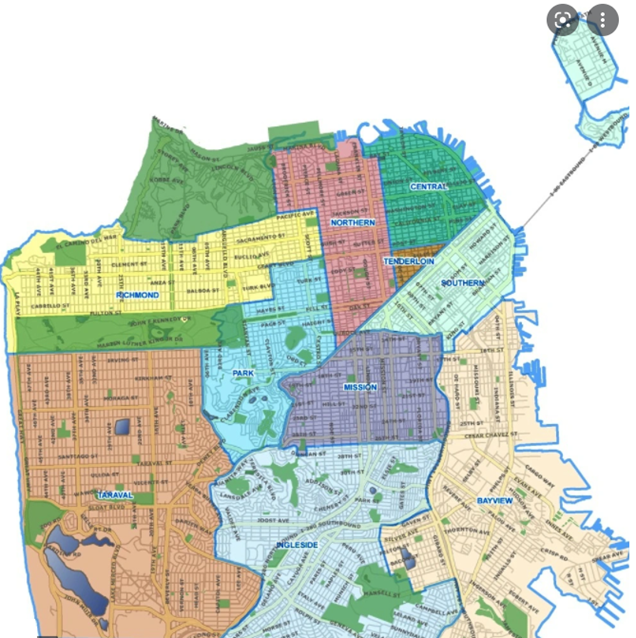

the table and map has a more distinctive classification about safest and dangerous areas.

The above table has a classification between districts and counts. We can see the least safe areas according to the statistics.

Now let's superimpose the locations of the crimes onto the map. 
The way to do that in **Folium** is to create first a table temporal grouping by Neighborhood. additional, we are to show a plot with Districts and totales.

Notice how the most dangerous areas are Central, Northern, Mission and Southern. likewise, the safest are Richmond and Park. Consequently, in these last two areas we will concentrate our exploration.

### Part 7.4: Display Crime rate in San Francisco, by Neigborhood

In [12]:
gjson = r'https://cocl.us/sanfran_geojson'
#gjson = 'san-francisco2.geojson'
# Create map
sf_map = folium.Map(location = [37.77, -122.42], zoom_start = 12)

#generate map
sf_map.choropleth(
    geo_data=gjson,
    data=table,
    columns=['Neighborhood', 'Count'],
    key_on='feature.properties.DISTRICT',
    fill_color='YlOrRd', 
    fill_opacity=0.7, 
    line_opacity=0.2,
    legend_name='Crime Rate in San Francisco, by Neighborhood')


sf_map

### Notice how when you zoom out , all markers are grouped into the big areas with the total number of crimes.

### Part 7.5: Display Crime rate by Districts in San Francisco - Plot graphics

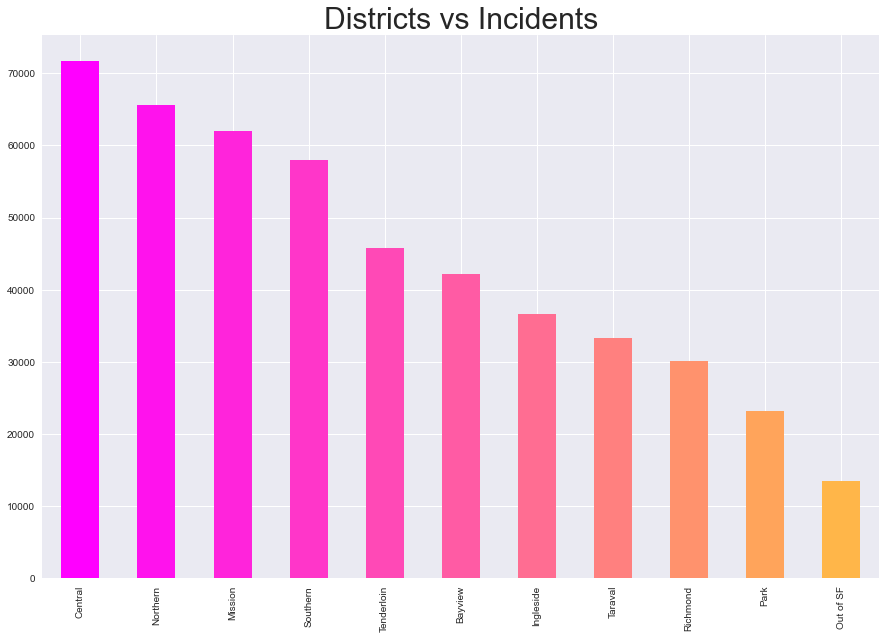

In [11]:
# Regions with count of crimes
import matplotlib.pyplot as plt

plt.rcParams['figure.figsize'] = (20, 9)
plt.style.use('seaborn')

color = plt.cm.spring(np.linspace(0, 1, 15))
df_incidents['PdDistrict'].value_counts().plot.bar(color = color, figsize = (15, 10))

plt.title('Districts vs Incidents',fontsize = 30)

plt.xticks(rotation = 90)
plt.show()

Now let's watch the graphics by plots District's and crimes onto the map. 
The way to do that is importing matplotlib.pyplot as plt.
We can check the Districts safest are: Park and RichMond, because their crime rates are lower than the rest. in deed, if the area is safe, the business is more likely to be successful.

According to the incident report from 2018 to date, the safest districts and neighborhoods are Park and Richmond (with rates 23219 and 30103). For its part, the most insecure are Central an Northern with rates 71731 and 65588.

In fact, with these statistics the ideal places to have a "coffee shop" are: Park and Richmond for safety aspects

### Part 7.6: Conclusion Crime rate by Districts in San Francisco

According with the information of datasets processed The Target districts are: Park and Richmond. In these areas we can stay more safest than the rest and we can develop business.


==================================

Districts Safest in San Francisco

Park and Richmond. 

==================================


<hr>



### Part 8.1: Load Json Data from Url with dataset includes the locations of businesses 

In [13]:
# Load json data from url
# This dataset includes the locations of businesses that pay taxes to the City and County of San Francisco. Each registered business may have multiple locations and each location is a single row. The Treasurer & Tax Collector’s Office collects this data through business registration
#with urllib.request.urlopen("https://data.sfgov.org/resource/g8m3-pdis.json") as url:
with urllib.request.urlopen("https://data.sfgov.org/resource/wg3w-h783.json") as url:
    francisco = json.loads(url.read().decode())
    


In [14]:
# Create neighborhoods_data that includes just variable Registered Business Locations - San Francisco 
neighborhoods_data = francisco
neighborhoods_data[0]
#print(neighborhoods_data)
#neighborhoods_data[0]['neighborhoods_analysis_boundaries']
#neighborhoods_data[0]['location']['coordinates'][0]
#neighborhoods_data[0]['location']['coordinates'][1]

{'incident_datetime': '2021-05-14T01:51:00.000',
 'incident_date': '2021-05-14T00:00:00.000',
 'incident_time': '01:51',
 'incident_year': '2021',
 'incident_day_of_week': 'Friday',
 'report_datetime': '2021-05-14T01:57:00.000',
 'row_id': '103010326030',
 'incident_id': '1030103',
 'incident_number': '210295348',
 'cad_number': '211340138',
 'report_type_code': 'II',
 'report_type_description': 'Initial',
 'incident_code': '26030',
 'incident_category': 'Arson',
 'incident_subcategory': 'Arson',
 'incident_description': 'Arson',
 'resolution': 'Open or Active',
 'intersection': '03RD ST \\ CUSTER AVE',
 'cnn': '20240000',
 'police_district': 'Bayview',
 'analysis_neighborhood': 'Bayview Hunters Point',
 'supervisor_district': '10',
 'latitude': '37.74425940578451',
 'longitude': '-122.38737260846696',
 'point': {'type': 'Point',
  'coordinates': [-122.38737260846696, 37.74425940578451]},
 ':@computed_region_jwn9_ihcz': '56',
 ':@computed_region_26cr_cadq': '9',
 ':@computed_region_qgn

### Part 8.2: Transform Json Data into Dataframe of locations of businesses

In [15]:
# Empty array with column names
column_names = ['Neighborhood', 'Latitude', 'Longitude','police_district'] 
# Instantiate dataframe
neighborhoods = pd.DataFrame(columns = column_names)
neighborhoods

,Neighborhood,Latitude,Longitude,police_district


In [16]:
                
# Pull in respective data from json using for loop
for data in neighborhoods_data:
    if 'analysis_neighborhood' in data:        
        neighborhood_name = data['analysis_neighborhood']
        #neighborhood_lat = data['location']['coordinates'][1]
        #neighborhood_long = data['location']['coordinates'][0]
        neighborhood_lat = float(data['latitude'])
        neighborhood_long = float(data['longitude'])
        neighborhood_district = data['police_district']
# Fill neighborhoods dataframe we created above with data
        neighborhoods = neighborhoods.append({                                          
                                          'Neighborhood': neighborhood_name,
                                          'Latitude': neighborhood_lat,
                                          'Longitude': neighborhood_long,
                                           'police_district': neighborhood_district}, ignore_index=True)
    

    

In [17]:

neighborhoods.shape
neighborhoods.head()

,Neighborhood,Latitude,Longitude,police_district
0,Bayview Hunters Point,37.744259,-122.387373,Bayview
1,Financial District/South Beach,37.793230,-122.393181,Central
2,South of Market,37.771296,-122.405425,Southern
3,Bayview Hunters Point,37.743124,-122.403275,Bayview
4,Financial District/South Beach,37.786379,-122.395645,Southern


### Part 8.3: Cleaning and first evaluation for initial dataset

#### Evaluating for Missing Data in Data set with "San francisco Locations"

The missing values are converted to Python's default. We use Python's built-in functions to identify these missing values. There are two methods to detect missing data:

1 .isnull()

2 .notnull()

The output is a boolean value indicating whether the value that is passed into the argument is in fact missing data.

In [18]:
missing_data = neighborhoods.isnull().sum()
missing_data.head()

Neighborhood       0
Latitude           0
Longitude          0
police_district    0
dtype: int64

#### Remove Duplicates

In [19]:
#neighborhoods.tail(100)

neighborhoods =neighborhoods.drop_duplicates()
neighborhoods.head()
neighborhoods.shape

(587, 4)

In [ ]:
## (["Central", "Northern", "Park", "Southern", "Mission", "Tenderloin", "Richmond", "Taraval", "Ingleside", "Bayview"])
# 1   => Richmond
# 2   => Central
# 3   => Northern
# 4   => Taraval
# 5   => Park
# 6  =>  Tenderloin
# 7  =>  Taraval
# 8  =>  Mission
# 9  =>  Ingleside
# 10 =>  Bayview
#import pandas as pd
#pd.pivot_table(neighborhoods,index=["police_district","Neighborhood"])

In [20]:
# Check first few rows for our newly created neighborhoods dataframe
##neighborhoods.tail()
#neighborhoods.tail(100)
#neighborhoods100=neighborhoods[0:100]
# Print number of unique neighborhoods in our dataframe. 

print('San Francisco  has {}  neighborhoods.'.format(neighborhoods.shape[0]))

San Francisco  has 587  neighborhoods.


### Part 8.4: Check Neighborhoods, grouping and counting


In [21]:
neighborhoods.head()

,Neighborhood,Latitude,Longitude,police_district
0,Bayview Hunters Point,37.744259,-122.387373,Bayview
1,Financial District/South Beach,37.793230,-122.393181,Central
2,South of Market,37.771296,-122.405425,Southern
3,Bayview Hunters Point,37.743124,-122.403275,Bayview
4,Financial District/South Beach,37.786379,-122.395645,Southern


### Displaying police_district and Neighborhoods

In [22]:
gkPoliceDistrict = neighborhoods.groupby(['police_district','Neighborhood'])

gkPoliceDistrict.first()


Latitude   Longitude
police_district Neighborhood                                         
Bayview         Bayview Hunters Point           37.744259 -122.387373
                Bernal Heights                  37.744298 -122.404527
                McLaren Park                    37.723599 -122.413959
                Mission                         37.763254 -122.406306
                Portola                         37.734018 -122.406515
                Potrero Hill                    37.754707 -122.396675
                Visitacion Valley               37.715390 -122.399548
Central         Bayview Hunters Point           37.735054 -122.384475
                Chinatown                       37.794198 -122.406821
                Financial District/South Beach  37.793230 -122.393181
                Hayes Valley                    37.774858 -122.427631
                Marina                          37.799843 -122.436046
                Nob Hill                        37.788178 -122.416827
                North Beach                     37.808214 -122.415802
                Russian Hill                    37.804999 -122.418531
                Tenderloin                      37.786101 -122.418088
Ingleside       Bayview Hunters Point           37.711818 -122.403280
                Bernal Heights                  37.747301 -122.411388
                Excelsior                       37.723591 -122.428074
                Glen Park                       37.740122 -122.428736
                McLaren Park                    37.724710 -122.419875
                Noe Valley                      37.745299 -122.426822
                Outer Mission                   37.715430 -122.441799
                Visitacion Valley               37.717820 -122.407272
                West of Twin Peaks              37.739282 -122.460015
Mission         Bayview Hunters Point           37.729354 -122.389419
                Bernal Heights                  37.748971 -122.405627
                Castro/Upper Market             37.761821 -122.432871
                Mission                         37.753121 -122.404363
                Noe Valley                      37.754296 -122.437649
                Outer Mission                   37.728439 -122.440439
                Twin Peaks                      37.757960 -122.439622
Northern        Hayes Valley                    37.775950 -122.422788
                Japantown                       37.784944 -122.434730
                Marina                          37.801863 -122.428022
                Nob Hill                        37.787548 -122.421758
                Pacific Heights                 37.790874 -122.425802
                Presidio                        37.804724 -122.448279
                Tenderloin                      37.776541 -122.417501
                Western Addition                37.781940 -122.435814
Out of SF       Chinatown                       37.798442 -122.409879
                Lone Mountain/USF               37.781315 -122.457733
                Mission                         37.762579 -122.421662
                North Beach                     37.798268 -122.403520
                South of Market                 37.778785 -122.410401
                Western Addition                37.780496 -122.432140
Park            Castro/Upper Market             37.762553 -122.442983
                Golden Gate Park                37.771930 -122.454083
                Haight Ashbury                  37.762519 -122.449296
                Hayes Valley                    37.770351 -122.429225
                Inner Richmond                  37.775566 -122.459589
                Inner Sunset                    37.764272 -122.460958
                Lone Mountain/USF               37.778837 -122.445347
                Twin Peaks                      37.751799 -122.443548
                Western Addition                37.782239 -122.440963
Richmond        Golden Gate Park                37.767057 -

### Table above contains Filtered information about Neighborhoods by safe Districts!!!

### 8.5 Neighborhoods filtered according to district

In [23]:

neighborhoods_safe_park = neighborhoods[neighborhoods['police_district'] == 'Park'].reset_index(drop=True)
neighborhoods_safe_richmond = neighborhoods[neighborhoods['police_district'] == 'Richmond'].reset_index(drop=True)


frames = [neighborhoods_safe_park, neighborhoods_safe_richmond]
neighborhoods_safe= pd.concat(frames)
display(neighborhoods_safe)


,Neighborhood,Latitude,Longitude,police_district
0,Haight Ashbury,37.762519,-122.449296,Park
1,Haight Ashbury,37.768729,-122.449454,Park
2,Haight Ashbury,37.768944,-122.443356,Park
3,Haight Ashbury,37.769307,-122.431570,Park
4,Twin Peaks,37.751799,-122.443548,Park
5,Haight Ashbury,37.770210,-122.445345,Park
6,Inner Sunset,37.764272,-122.460958,Park
7,Inner Sunset,37.759091,-122.448080,Park
8,Lone Mountain/USF,37.778837,-122.445347,Park
9,Lone Mountain/USF,37.772790,-122.447497,Park


In [30]:
# applying groupby() function to
# group the data on team value.
gk = neighborhoods.groupby(['Neighborhood'])
# Let's print the first entries
# in all the groups formed.
gk.first()
neighborhoodsgrp=neighborhoods.groupby('Neighborhood').size().reset_index(name='counts').sort_values(by=['counts'])
neighborhoodsgrp.loc['Total', 'counts'] = neighborhoodsgrp['counts'].sum()
display(neighborhoodsgrp)
neighborhoodsgrp.dropna(subset = ["Neighborhood"], inplace=True)

neighborhoodsgrp2=neighborhoods.groupby('Neighborhood').size().reset_index(name='counts').sort_values(by=['Neighborhood'])
display(neighborhoodsgrp2)



,Neighborhood,counts
29,Presidio,1.0
35,Treasure Island,1.0
14,Lincoln Park,1.0
17,McLaren Park,2.0
36,Twin Peaks,3.0
6,Glen Park,4.0
23,Oceanview/Merced/Ingleside,4.0
30,Presidio Heights,5.0
27,Portola,5.0
37,Visitacion Valley,5.0


,Neighborhood,counts
0,Bayview Hunters Point,49
1,Bernal Heights,13
2,Castro/Upper Market,15
3,Chinatown,14
4,Excelsior,14
5,Financial District/South Beach,38
6,Glen Park,4
7,Golden Gate Park,6
8,Haight Ashbury,14
9,Hayes Valley,12


### Part 8.6: Visualize neighborhoods with Interactive Map and Plot Graphic

### [neighborhoods is a dataframe with Neighborhood,lat and Lng ]

In [31]:
# Use geopy to obtain latitude and longitude of NYC 
address = 'San Francisco,CA'
geolocator = Nominatim(user_agent="sf_explorer") # Need to define user_agent in order to instantiate geocoder. Here we use ny_explorer as the name of the user_agent
location = geolocator.geocode(address)
lat = location.latitude
long = location.longitude

print('The latitude and longitude of San Francisco City are {}, {}.'.format(lat, long))


The latitude and longitude of San Francisco City are 37.7790262, -122.419906.


In [76]:
# create map and display it
#sanfran_map = folium.Map(location=[lat, long], zoom_start=12)

# display the map of San Francisco
#sanfran_map
# Add markers to the map
#markers_colors = []
#for lat, long, poi in zip(fco_merged['Latitude'].astype(float), fco_merged['Longitude'].astype(float), fco_merged['Neighborhood']):
   # print("==>",lat, long,cluster,rainbow,cluster,label)
#    label = folium.Popup(str(poi) + ' Neighborhood => ' , parse_html=True)
#    folium.CircleMarker(
#        [lat, long],
#        radius=6,
#        popup=label,
#        fill_color='YlOrRd', 
#        fill_opacity=0.7).add_to(sanfran_map)
#sanfran_map

gjson = 'SF Find Neighborhoods.geojson'
#gjson = 'san-francisco2.geojson'
# Create map
sf_map = folium.Map(location = [37.77, -122.42], zoom_start = 12)

#generate map
sf_map.choropleth(
    geo_data=gjson,
    data=neighborhoodsgrp,
    columns=['Neighborhood','counts'],
    key_on='feature.properties.name',
    fill_color='YlOrRd', 
    fill_opacity=0.7, 
    line_opacity=0.2,
    legend_name='Locations of businesses in San Francisco, by Neighborhood')


sf_map

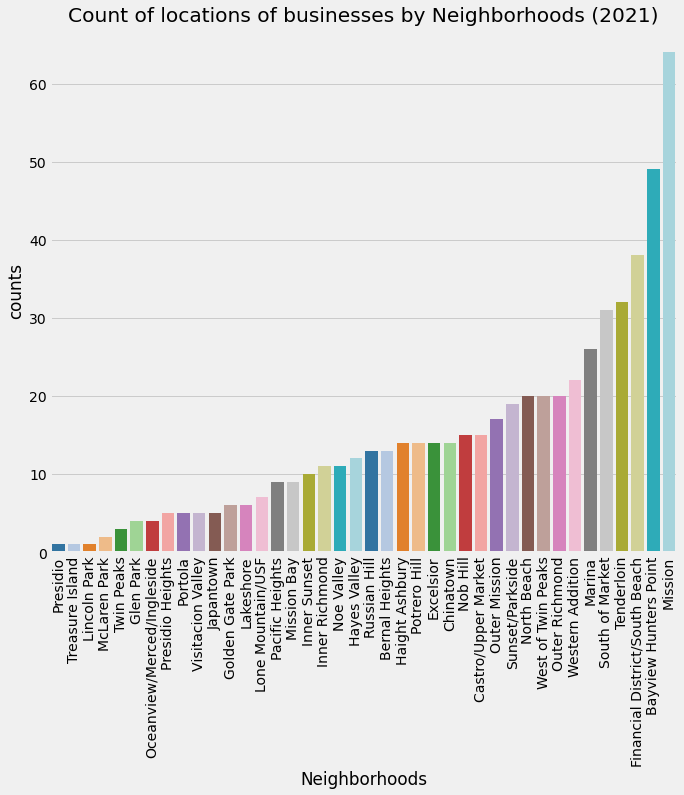

In [156]:
import seaborn as sns 
fig, ax = plt.subplots(figsize=(10, 9))
fig = sns.barplot(neighborhoodsgrp['Neighborhood'],neighborhoodsgrp['counts'], palette='tab20', ax=ax)
fig.set_xticklabels(fig.get_xticklabels(), rotation=90)
plt.title("Count of locations of businesses by Neighborhoods (2021)")
plt.xlabel("Neighborhoods")
plt.savefig("neighborhoodsgrp",bbox_inches='tight')
plt.show(fig)


==================================

Analyzing  Part 8.6 and Part 7.6 takes the Safest Neighborhoods by Park and Richmond Districts.


==================================

### Part 8.6:  Neighborhood's rates by Districts in San Francisco

According with the information of datasets processed The Target districts are: Park and Richmond. In these sections we can stay more safest than the rest and we can develop business.


### Part 8.7:  Segment Safest  Neighborhoods with their Venues

In [78]:
radius=500 
LIMIT=100
def getNearbyVenues(names, latitudes, longitudes, radius=500):
    venues_list=[]
    
    for name, lat, lng in zip(names, latitudes, longitudes):
        print(name, lat, lng)
            
        # create the API request URL
        url = 'https://api.foursquare.com/v2/venues/explore?&client_id={}&client_secret={}&v={}&ll={},{}&radius={}&limit={}'.format(
           'INGC4CIZSVHHTY5QLQ5GIS0B3XDBSRYW1GRBUPZ1AZIIGAEV', 
           'N5OGQQGWR3URH1ZMPN4BHPMNHZRLJY1KN25DQAK4NA5PFB2Q', 
           '20210712', 
           lat,
           lng, 
            radius, 
            LIMIT)
            
        # make the GET request
        results = requests.get(url).json()["response"]['groups'][0]['items']
        #print(venues_list)
          # return only relevant information for each nearby venue
        venues_list.append([(
            name, 
            lat, 
            lng, 
            v['venue']['name'], 
            v['venue']['location']['lat'], 
            v['venue']['location']['lng'],  
            v['venue']['categories'][0]['name']) for v in results])

    nearby_venues = pd.DataFrame([item for venue_list in venues_list for item in venue_list])
    nearby_venues.columns = ['Neighborhood', 
                  'Neighborhood Latitude', 
                  'Neighborhood Longitude', 
                  'Venue', 
                  'Venue Latitude', 
                  'Venue Longitude', 
                  'Venue Category']
    
    return(nearby_venues)

### Part 8.8 Takes Safest Neighborhoods by Park and Richmond Districts and get Nearby Venues to calculate frequency by category

(dataframe =>neighborhoods_safe) 

In [79]:
## Park and Richmond  (neighborhoods_safe 's )
neighborhoods_safe.head()
neighborhoods_safe.shape
#neighborhoods22 = neighborhoods[neighborhoods['Neighborhood'] == 'Richmond'].reset_index(drop=True)
#neighborhoods22.head()

(77, 4)

In [80]:
print('San Francisco  has {} safest neighborhoods.'.format(neighborhoods_safe.shape[0]))

San Francisco  has 77 safest neighborhoods.


In [81]:
fran_venues = getNearbyVenues(names=neighborhoods_safe['Neighborhood'],
                                   latitudes=neighborhoods_safe['Latitude'],
                                   longitudes=neighborhoods_safe['Longitude']
                                  )

Haight Ashbury 37.76251930305029 -122.44929602493275
Haight Ashbury 37.768728891202635 -122.44945410670219
Haight Ashbury 37.76894423372636 -122.44335605613303
Haight Ashbury 37.76930716079065 -122.43157038183614
Twin Peaks 37.75179935533094 -122.44354757820349
Haight Ashbury 37.77021017395845 -122.44534499148274
Inner Sunset 37.764271898398015 -122.46095770616347
Inner Sunset 37.759090505996554 -122.44808012284106
Lone Mountain/USF 37.778836631782454 -122.44534674121451
Lone Mountain/USF 37.77279045274103 -122.44749724585684
Haight Ashbury 37.76905845294093 -122.43579421432649
Castro/Upper Market 37.7625528523483 -122.44298317138012
Castro/Upper Market 37.76599632858727 -122.43103778043064
Lone Mountain/USF 37.77601659060897 -122.44477989251513
Inner Sunset 37.76481006765861 -122.45771818958592
Haight Ashbury 37.769378662723035 -122.4518657283479
Haight Ashbury 37.77063763481854 -122.44199776339865
Castro/Upper Market 37.766662029418555 -122.43333190593823
Inner Richmond 37.7755664589

In [82]:
fran_venues.shape
fran_venues.head(20)

,Neighborhood,Neighborhood Latitude,Neighborhood Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category
0,Haight Ashbury,37.762519,-122.449296,Zazie,37.765282,-122.449919,Breakfast Spot
1,Haight Ashbury,37.762519,-122.449296,Tank Hill Park,37.759972,-122.447655,Park
2,Haight Ashbury,37.762519,-122.449296,Adel's Wine Cellar,37.761543,-122.448889,Wine Bar
3,Haight Ashbury,37.762519,-122.449296,Cole Hardware,37.765248,-122.449556,Hardware Store
4,Haight Ashbury,37.762519,-122.449296,Grattan Park,37.762804,-122.451565,Playground
5,Haight Ashbury,37.762519,-122.449296,Luke's Local,37.765012,-122.449653,Organic Grocery
6,Haight Ashbury,37.762519,-122.449296,Beit Rima Carl Street,37.765841,-122.449755,Middle Eastern Restaurant
7,Haight Ashbury,37.762519,-122.449296,Padrecito,37.765744,-122.450065,Mexican Restaurant
8,Haight Ashbury,37.762519,-122.449296,Mount Olympus,37.763306,-122.445543,Monument / Landmark
9,Haight Ashbury,37.762519,-122.449296,Say Cheese,37.766055,-122.449962,Cheese Shop


In [83]:
# Check number of unique venue categories.
print('There are {} uniques categories.'.format(len(fran_venues['Venue Category'].unique())))

There are 261 uniques categories.


In [84]:
print('There are {} uniques categories.',fran_venues['Venue Category'].unique())

There are {} uniques categories. ['Breakfast Spot' 'Park' 'Wine Bar' 'Hardware Store' 'Playground'
 'Organic Grocery' 'Middle Eastern Restaurant' 'Mexican Restaurant'
 'Monument / Landmark' 'Cheese Shop' 'Coffee Shop' 'Ice Cream Shop'
 'Pharmacy' 'Toy / Game Store' 'Road' 'Pet Store' 'Bar'
 'Mediterranean Restaurant' 'Bakery' 'Café' 'Gym' 'Restaurant'
 'Italian Restaurant' 'Gift Shop' 'Convenience Store' 'Sushi Restaurant'
 'Grocery Store' 'Laundromat' 'Cosmetics Shop' 'Intersection' 'Public Art'
 'Bus Stop' 'Skate Park' 'Trail' 'Video Store' 'Electronics Store'
 'Garden' 'Bookstore' 'Accessories Store' 'Vietnamese Restaurant'
 'Supermarket' 'Cocktail Bar' 'Taco Place' 'Caribbean Restaurant'
 'Indian Restaurant' 'Tattoo Parlor' 'Pizza Place' 'Jazz Club'
 'Miscellaneous Shop' 'Record Shop' 'Tapas Restaurant' 'Board Shop'
 'Thrift / Vintage Store' 'Shoe Store' 'Arcade' 'Music Store' 'Dive Bar'
 'Arts & Crafts Store' 'Thai Restaurant' 'Boutique' 'Smoke Shop'
 'Yoga Studio' 'Vegetarian / V

In [85]:
# Check number of venues by neighborhood
fran_venues.groupby("Neighborhood").count()

,Neighborhood Latitude,Neighborhood Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category
Neighborhood,,,,,,
Castro/Upper Market,215,215,215,215,215,215
Golden Gate Park,213,213,213,213,213,213
Haight Ashbury,908,908,908,908,908,908
Hayes Valley,174,174,174,174,174,174
Inner Richmond,604,604,604,604,604,604
Inner Sunset,272,272,272,272,272,272
Japantown,48,48,48,48,48,48
Lincoln Park,11,11,11,11,11,11
Lone Mountain/USF,256,256,256,256,256,256


In [86]:
# One hot encoding venue categories creates binary dummy varable for each category
fran_onehot = pd.get_dummies(fran_venues[['Venue Category']], prefix="", prefix_sep="")

# Add neighborhood column to newly created one hot encoded dataframe
fran_onehot['Neighborhood'] = fran_venues['Neighborhood'] 

# Move neighborhood column to the first column
fixed_columns = [fran_onehot.columns[-1]] + list(fran_onehot.columns[:-1])
fran_onehot =fran_onehot[fixed_columns]

fran_onehot.head()


,Zoo,ATM,Accessories Store,Adult Boutique,American Restaurant,Antique Shop,Aquarium,Arcade,Art Gallery,Art Museum,Arts & Crafts Store,Asian Restaurant,Athletics & Sports,Automotive Shop,BBQ Joint,Baby Store,Bagel Shop,Bakery,Bank,Bar,Baseball Field,Basketball Stadium,Bath House,Beach,Bed & Breakfast,Beer Bar,Beer Garden,Beer Store,Big Box Store,Bike Rental / Bike Share,Bike Shop,Board Shop,Bookstore,Botanical Garden,Boutique,Bowling Green,Breakfast Spot,Brewery,Bubble Tea Shop,Burger Joint,Burmese Restaurant,Burrito Place,Bus Line,Bus Station,Bus Stop,Cafeteria,Café,Camera Store,Candy Store,Cantonese Restaurant,Car Wash,Caribbean Restaurant,Cheese Shop,Chinese Restaurant,Church,Clothing Store,Cocktail Bar,Coffee Shop,College Gym,Comic Shop,Concert Hall,Convenience Store,Cosmetics Shop,Costume Shop,Credit Union,Creperie,Cultural Center,Cupcake Shop,Cycle Studio,Dance Studio,Deli / Bodega,Design Studio,Dessert Shop,Dim Sum Restaurant,Diner,Disc Golf,Dive Bar,Dog Run,Donut Shop,Dry Cleaner,Dumpling Restaurant,Eastern European Restaurant,Egyptian Restaurant,Electronics Store,Ethiopian Restaurant,Event Space,Exhibit,Eye Doctor,Falafel Restaurant,Farmers Market,Fast Food Restaurant,Field,Financial or Legal Service,Flea Market,Flower Shop,Food & Drink Shop,Food Court,Food Truck,Forest,Fountain,Frame Store,French Restaurant,Frozen Yogurt Shop,Furniture / Home Store,Garden,Garden Center,Gas Station,Gastropub,Gay Bar,General Entertainment,Gift Shop,Golf Course,Gourmet Shop,Grocery Store,Gym,Gym / Fitness Center,Hardware Store,Health & Beauty Service,Herbs & Spices Store,Hill,Historic Site,Home Service,Hookah Bar,Hotel,Hotel Bar,Hotpot Restaurant,Ice Cream Shop,Indian Restaurant,Indie Movie Theater,Intersection,Irish Pub,Italian Restaurant,Japanese Curry Restaurant,Japanese Restaurant,Jazz Club,Jewelry Store,Juice Bar,Karaoke Bar,Korean Restaurant,Lake,Latin American Restaurant,Laundromat,Laundry Service,Light Rail Station,Lingerie Store,Liquor Store,Lounge,Marijuana Dispensary,Market,Massage Studio,Mattress Store,Mediterranean Restaurant,Men's Store,Mexican Restaurant,Middle Eastern Restaurant,Miscellaneous Shop,Mobile Phone Shop,Monument / Landmark,Moroccan Restaurant,Motel,Movie Theater,Moving Target,Museum,Music Store,Music Venue,Nabe Restaurant,Nail Salon,Neighborhood,New American Restaurant,Nightclub,Noodle House,Optical Shop,Organic Grocery,Other Great Outdoors,Other Nightlife,Outdoor Sculpture,Park,Pedestrian Plaza,Performing Arts Venue,Peruvian Restaurant,Pet Store,Pharmacy,Physical Therapist,Picnic Area,Pizza Place,Planetarium,Playground,Plaza,Poke Place,Pool,Pool Hall,Pub,Public Art,Ramen Restaurant,Record Shop,Recreation Center,Rental Car Location,Reservoir,Restaurant,Road,Russian Restaurant,Salad Place,Salon / Barbershop,Salvadoran Restaurant,Sandwich Place,Sausage Shop,Scandinavian Restaurant,Scenic Lookout,Science Museum,Sculpture Garden,Seafood Restaurant,Shabu-Shabu Restaurant,Shanghai Restaurant,Shipping Store,Shoe Store,Shop & Service,Shopping Mall,Skate Park,Skating Rink,Smoke Shop,Southern / Soul Food Restaurant,Souvlaki Shop,Spa,Spanish Restaurant,Spiritual Center,Sporting Goods Shop,Sports Bar,Sports Club,Supermarket,Supplement Shop,Surf Spot,Sushi Restaurant,Szechuan Restaurant,Taco Place,Tailor Shop,Taiwanese Restaurant,Tapas Restaurant,Tattoo Parlor,Tea Room,Tennis Court,Thai Restaurant,Theater,Thrift / Vintage Store,Tiki Bar,Tour Provider,Toy / Game Store,Track,Track Stadium,Trail,Tunnel,Turkish Restaurant,Vegetarian / Vegan Restaurant,Video Store,Vietnamese Restaurant,Waterfall,Windmill,Wine Bar,Wine Shop,Wings Joint,Women's Store,Yoga Studio
0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,Haight Ashbury,0,0,0,0,0,0,0,0,0,0,0,0

In [87]:
# Check dimension of one hot encoded dataframe
fran_onehot.shape
column_names=['Neighborhood', 'Venue','Value'] 
Top10VenuesXneighborhoods = pd.DataFrame(columns = column_names)
Top10VenuesXneighborhoods
#print(column_names[0])
#print(column_names[1:-1])
#print(column_names[:-1])

,Neighborhood,Venue,Value


In [88]:
# Let's look at frequency of venue category in each neighborhood 
fran_grouped_1 = fran_onehot.groupby('Neighborhood').mean().reset_index()

rows_list = []
for idx, row in fran_grouped_1.iterrows():        
    neigborhood=row.iloc[0:1]    
    print('Processed=>',neigborhood[0],'|')
    #rows_list=    
    singleNeighborhood = pd.Series(row.iloc[1:-1])
    singleNeighborhoodSort =singleNeighborhood.sort_values(ascending=False)
    singleNeighborhoodSort =singleNeighborhoodSort[0:11]
    #print('tipo=',type(singleNeighborhoodSort))
    for dataitemvenue in singleNeighborhoodSort.iteritems():
        #print('===) ',dataitemvenue[0])
        Top10VenuesXneighborhoods = Top10VenuesXneighborhoods.append({                                          
                                          'Neighborhood':neigborhood[0],
                                          'Venue':dataitemvenue[0],
                                          'Value': dataitemvenue[1]}, ignore_index=True)

  
    #print(singleNeighborhoodSort[:-1],'+++++++++++++',singleNeighborhoodSort[:-1])
    #for data in singleNeighborhoodSort[:-1]:        
        #rows_list.append(data)
        #print('data-')
    #print(s1[:-1][0],'-',s1[:-1])
    #print('+++++++++++++++++++++++')


Processed=> Castro/Upper Market |
Processed=> Golden Gate Park |
Processed=> Haight Ashbury |
Processed=> Hayes Valley |
Processed=> Inner Richmond |
Processed=> Inner Sunset |
Processed=> Japantown |
Processed=> Lincoln Park |
Processed=> Lone Mountain/USF |
Processed=> Outer Richmond |
Processed=> Presidio Heights |
Processed=> Twin Peaks |
Processed=> Western Addition |


### Part 8.9: Let's look at the top 10 venues and their category an frequency in each neighborhood

In [155]:
Top10VenuesXneighborhoods.sort_values('Venue', ascending=False).groupby(['Neighborhood','Value','Venue']).first()
#Top10VenuesXneighborhoods.sort_values('Value').groupby(['Neighborhood','Venue']).first()
#Top10VenuesXneighborhoods.sort_values('Value', ascending=False).groupby(['Neighborhood','Value']).first()



Empty DataFrame
Columns: []
Index: [(Castro/Upper Market, 0.018604651162790697, Asian Restaurant), (Castro/Upper Market, 0.018604651162790697, Dog Run), (Castro/Upper Market, 0.018604651162790697, Men's Store), (Castro/Upper Market, 0.018604651162790697, Playground), (Castro/Upper Market, 0.018604651162790697, Sandwich Place), (Castro/Upper Market, 0.027906976744186046, Gym), (Castro/Upper Market, 0.027906976744186046, Mexican Restaurant), (Castro/Upper Market, 0.03255813953488372, Grocery Store), (Castro/Upper Market, 0.037209302325581395, Coffee Shop), (Castro/Upper Market, 0.046511627906976744, Park), (Castro/Upper Market, 0.05116279069767442, Gay Bar), (Golden Gate Park, 0.018779342723004695, Bubble Tea Shop), (Golden Gate Park, 0.018779342723004695, Bus Station), (Golden Gate Park, 0.018779342723004695, Grocery Store), (Golden Gate Park, 0.018779342723004695, Pizza Place), (Golden Gate Park, 0.018779342723004695, Science Museum), (Golden Gate Park, 0.018779342723004695, Trail), (Golden Gate Park, 0.023474178403755867, Playground), (Golden Gate Park, 0.028169014084507043, Coffee Shop), (Golden Gate Park, 0.03286384976525822, Lake), (Golden Gate Park, 0.051643192488262914, Garden), (Golden Gate Park, 0.09859154929577464, Park), (Haight Ashbury, 0.022026431718061675, Ice Cream Shop), (Haight Ashbury, 0.024229074889867842, Bookstore), (Haight Ashbury, 0.02643171806167401, Shoe Store), (Haight Ashbury, 0.02753303964757709, Breakfast Spot), (Haight Ashbury, 0.028634361233480177, Pizza Place), (Haight Ashbury, 0.030837004405286344, Clothing Store), (Haight Ashbury, 0.031938325991189426, Café), (Haight Ashbury, 0.03634361233480176, Park), (Haight Ashbury, 0.039647577092511016, Thrift / Vintage Store), (Haight Ashbury, 0.046255506607929514, Coffee Shop), (Haight Ashbury, 0.05506607929515418, Boutique), (Hayes Valley, 0.022988505747126436, Bakery), (Hayes Valley, 0.022988505747126436, Chinese Restaurant), (Hayes Valley, 0.022988505747126436, Clothing Store), (Hayes Valley, 0.022988505747126436, Dive Bar), (Hayes Valley, 0.022988505747126436, Mexican Restaurant), (Hayes Valley, 0.022988505747126436, Park), (Hayes Valley, 0.022988505747126436, Pet Store), (Hayes Valley, 0.034482758620689655, Cocktail Bar), (Hayes Valley, 0.034482758620689655, Coffee Shop), (Hayes Valley, 0.034482758620689655, Grocery Store), (Hayes Valley, 0.040229885057471264, Sushi Restaurant), (Inner Richmond, 0.018211920529801324, Asian Restaurant), (Inner Richmond, 0.019867549668874173, Café), (Inner Richmond, 0.026490066225165563, Burmese Restaurant), (Inner Richmond, 0.026490066225165563, Park), (Inner Richmond, 0.026490066225165563, Thai Restaurant), (Inner Richmond, 0.028145695364238412, Sushi Restaurant), (Inner Richmond, 0.029801324503311258, Vietnamese Restaurant), (Inner Richmond, 0.033112582781456956, Korean Restaurant), (Inner Richmond, 0.04470198675496689, Japanese Restaurant), (Inner Richmond, 0.04966887417218543, Bakery), (Inner Richmond, 0.06788079470198675, Chinese Restaurant), (Inner Sunset, 0.022058823529411766, Breakfast Spot), (Inner Sunset, 0.022058823529411766, Park), (Inner Sunset, 0.022058823529411766, Sandwich Place), (Inner Sunset, 0.022058823529411766, Thai Restaurant), (Inner Sunset, 0.025735294117647058, Ice Cream Shop), (Inner Sunset, 0.025735294117647058, Pizza Place), (Inner Sunset, 0.025735294117647058, Science Museum), (Inner Sunset, 0.029411764705882353, Bakery), (Inner Sunset, 0.029411764705882353, Sushi Restaurant), (Inner Sunset, 0.04044117647058824, Garden), (Inner Sunset, 0.04779411764705882, Coffee Shop), (Japantown, 0.020833333333333332, Church), (Japantown, 0.020833333333333332, Nightclub), (Japantown, 0.041666666666666664, Bakery), (Japantown, 0.041666666666666664, Cosmetics Shop), (Japantown, 0.041666666666666664, Gym / Fitness Center), (Japantown, 0.041666666666666664, Salon / Barbershop), (Japantown, 0.041666666666666664, Sandwich Place), (Japantown, 0.041666666666666664, Spa), (Japantown, 0.041666666666666664, Sport

### Analyzing the top 10 reports by neighborhood can be determined the coffee shop is a frequent and common business in the majority the venues.


<hr>

 ### Part 8.9: Let's look at the top 5 venues and their category an frequency in each neighborhood

In [137]:
# Let's look at the top 5 venues and their category an frequency in each neighborhood
num_top_venues = 5

for hood in fran_grouped['Neighborhood']:
    print("----"+hood+"----")
    temp = fran_grouped[fran_grouped['Neighborhood'] == hood].T.reset_index()
    temp.columns = ['venue','freq']
    temp = temp.iloc[1:]
    temp['freq'] = temp['freq'].astype(float)
    temp = temp.round({'freq': 2})
    print(temp.sort_values('freq', ascending=False).reset_index(drop=True).head(num_top_venues))
    print('\n')

----Castro/Upper Market----
           venue  freq
0           Park  0.05
1        Gay Bar  0.05
2    Coffee Shop  0.04
3  Grocery Store  0.03
4            Gym  0.03


----Golden Gate Park----
         venue  freq
0         Park  0.10
1       Garden  0.05
2         Lake  0.03
3  Coffee Shop  0.03
4        Trail  0.02


----Haight Ashbury----
                    venue  freq
0                Boutique  0.06
1             Coffee Shop  0.05
2  Thrift / Vintage Store  0.04
3                    Park  0.04
4          Clothing Store  0.03


----Hayes Valley----
                venue  freq
0    Sushi Restaurant  0.04
1       Grocery Store  0.03
2         Coffee Shop  0.03
3        Cocktail Bar  0.03
4  Chinese Restaurant  0.02


----Inner Richmond----
                 venue  freq
0   Chinese Restaurant  0.07
1               Bakery  0.05
2  Japanese Restaurant  0.04
3   Burmese Restaurant  0.03
4     Sushi Restaurant  0.03


----Inner Sunset----
            venue  freq
0     Coffee Shop  0.05
1  

In [138]:
# Let's look at the most common types of venues by first defining a function
def most_common_venues(row, num_top_venues):
    row_categories = row.iloc[1:]
    row_categories_sorted = row_categories.sort_values(ascending=False)
    
    return row_categories_sorted.index.values[0:num_top_venues]

In [140]:
num_top_venues = 10

indicators = ['st', 'nd', 'rd']

# Create columns according to number of top venues
columns = ['Neighborhood']
for ind in np.arange(num_top_venues):
    try:
        columns.append('{}{} Most Common Venue'.format(ind+1, indicators[ind]))
    except:
        columns.append('{}th Most Common Venue'.format(ind+1))

# Create a new dataframe
neighborhoods_venues_sorted = pd.DataFrame(columns=columns)
neighborhoods_venues_sorted['Neighborhood'] = fran_grouped['Neighborhood']

for ind in np.arange(fran_grouped.shape[0]):
    neighborhoods_venues_sorted.iloc[ind, 1:] = most_common_venues(fran_grouped.iloc[ind, :], num_top_venues)

neighborhoods_venues_sorted.head()

,Neighborhood,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,Castro/Upper Market,Gay Bar,Park,Coffee Shop,Grocery Store,Gym,Mexican Restaurant,Men's Store,Playground,Asian Restaurant,Dog Run
1,Golden Gate Park,Park,Garden,Lake,Coffee Shop,Playground,Science Museum,Bubble Tea Shop,Gift Shop,Trail,Bus Station
2,Haight Ashbury,Boutique,Coffee Shop,Thrift / Vintage Store,Park,Café,Clothing Store,Pizza Place,Breakfast Spot,Shoe Store,Bookstore
3,Hayes Valley,Sushi Restaurant,Grocery Store,Cocktail Bar,Coffee Shop,Pizza Place,Mexican Restaurant,Café,Record Shop,Chinese Restaurant,Clothing Store
4,Inner Richmond,Chinese Restaurant,Bakery,Japanese Restaurant,Korean Restaurant,Vietnamese Restaurant,Sushi Restaurant,Burmese Restaurant,Park,Thai Restaurant,Café


### Part 8.10:  Clustering Neighborhoods

Let's cluster our venue categories using k means clustering, which is based on euclidian distance and clusters points around centroids that minimize within cluster sum of squares, wcss (how internally coherent clusters are). We'll need to decide on the number of clusters we want to use. To determine our optimal k, let's choose k that minizes wcss and pick the 'elbow point' in our plot.

We see that in our plot, it's difficult to see a clear elbow point, which suggests that k means clustering is actually not the best clustering method. For the purposes of this exercise, we'll choose 6 for our k value for k means clustering. Check out scikit learn's documentation on clustering (https://scikit-learn.org/stable/modules/clustering.html)

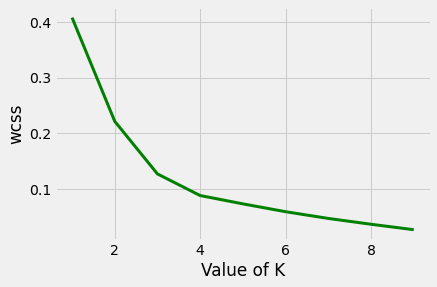

In [141]:

# Set dataframe for clustering, we only need the categories from our one hot encoded dataframe grouped by neighborhood
fran_grouped_clustering = fran_grouped.drop('Neighborhood', 1)

# Create empty array for within cluster sum of squares
wcss = [] 
for i in range(1, 10): 
    KM = KMeans(n_clusters = i, max_iter = 500) 
    KM.fit(fran_grouped_clustering) 
      
    # Calculate within cluster sum of squares using function KM.inertia_ 
    wcss.append(KM.inertia_)      

# Plot the cost against K values 

style.use("fivethirtyeight")
plt.plot(range(1, 10), wcss, color ='g', linewidth ='3') 
plt.xlabel("Value of K") 
plt.ylabel("wcss") 
plt.show()

### In cluster analysis, the elbow method shows a good candidate k= 4

In [142]:
# Set number of clusters
k = 4

# Run k-means clustering using initialization "k-means++" and number of times k-means will be run with different centroids (n_init) as 12
kmeans = KMeans(init = "k-means++", n_clusters = k, n_init = 12).fit(fran_grouped_clustering)

# check cluster labels generated for each row in the dataframe
kmeans.labels_[0:10]

array([0, 0, 0, 0, 0, 0, 2, 3, 0, 0])

In [143]:
neighborhoods_venues_sorted.head()

,Neighborhood,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,Castro/Upper Market,Gay Bar,Park,Coffee Shop,Grocery Store,Gym,Mexican Restaurant,Men's Store,Playground,Asian Restaurant,Dog Run
1,Golden Gate Park,Park,Garden,Lake,Coffee Shop,Playground,Science Museum,Bubble Tea Shop,Gift Shop,Trail,Bus Station
2,Haight Ashbury,Boutique,Coffee Shop,Thrift / Vintage Store,Park,Café,Clothing Store,Pizza Place,Breakfast Spot,Shoe Store,Bookstore
3,Hayes Valley,Sushi Restaurant,Grocery Store,Cocktail Bar,Coffee Shop,Pizza Place,Mexican Restaurant,Café,Record Shop,Chinese Restaurant,Clothing Store
4,Inner Richmond,Chinese Restaurant,Bakery,Japanese Restaurant,Korean Restaurant,Vietnamese Restaurant,Sushi Restaurant,Burmese Restaurant,Park,Thai Restaurant,Café


In [144]:
# Add clustering labels
neighborhoods_venues_sorted.insert(0, 'Cluster Labels', kmeans.labels_)

fco_merged = neighborhoods_safe

# merge tan_grouped with manhattan to add latitude/longitude for each neighborhood
fco_merged = fco_merged.join(neighborhoods_venues_sorted.set_index('Neighborhood'), on='Neighborhood')

fco_merged.head()


,Neighborhood,Latitude,Longitude,police_district,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,Haight Ashbury,37.762519,-122.449296,Park,0,Boutique,Coffee Shop,Thrift / Vintage Store,Park,Café,Clothing Store,Pizza Place,Breakfast Spot,Shoe Store,Bookstore
1,Haight Ashbury,37.768729,-122.449454,Park,0,Boutique,Coffee Shop,Thrift / Vintage Store,Park,Café,Clothing Store,Pizza Place,Breakfast Spot,Shoe Store,Bookstore
2,Haight Ashbury,37.768944,-122.443356,Park,0,Boutique,Coffee Shop,Thrift / Vintage Store,Park,Café,Clothing Store,Pizza Place,Breakfast Spot,Shoe Store,Bookstore
3,Haight Ashbury,37.769307,-122.431570,Park,0,Boutique,Coffee Shop,Thrift / Vintage Store,Park,Café,Clothing Store,Pizza Place,Breakfast Spot,Shoe Store,Bookstore
4,Twin Peaks,37.751799,-122.443548,Park,1,Trail,Scenic Lookout,Park,Hill,Tennis Court,Thai Restaurant,American Restaurant,Reservoir,Coffee Shop,Electronics Store


In [145]:
# Create map of clusters
map_clusters = folium.Map(location=[lat, long], zoom_start=12)
# San Francisco latitude and longitude values
# Set color scheme for the clusters
x = np.arange(k)
ys = [i + x + (i*x)**2 for i in range(k)]
colors_array = cm.rainbow(np.linspace(0, 1, len(ys)))
rainbow = [colors.rgb2hex(i) for i in colors_array]

# Add markers to the map
markers_colors = []
for lat, long, poi, cluster in zip(fco_merged['Latitude'].astype(float), fco_merged['Longitude'].astype(float), fco_merged['Neighborhood'], fco_merged['Cluster Labels']):
#    print("==>",lat, long,cluster,rainbow,cluster,label)
    label = folium.Popup(str(poi) + ' Cluster ' + str(cluster), parse_html=True)
    folium.CircleMarker(
        [lat, long],
        radius=6,
        popup=label,
        color=rainbow[cluster-1],
        fill=True,
        #fill_color=rainbow[cluster-1],
        fill_opacity=0.7).add_to(map_clusters)
       
map_clusters



In [159]:
 fco_merged[fco_merged['Cluster Labels'] == 2].head(20)

,Neighborhood,Latitude,Longitude,police_district,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
24,Western Addition,37.782239,-122.440963,Park,2,Cosmetics Shop,Gym / Fitness Center,Sandwich Place,Deli / Bodega,Park,Southern / Soul Food Restaurant,Spa,Burger Joint,Burrito Place,Sports Bar
35,Japantown,37.784107,-122.441349,Richmond,2,Chinese Restaurant,Yoga Studio,Gym / Fitness Center,Salon / Barbershop,Sports Bar,Sandwich Place,Sushi Restaurant,Bakery,Cosmetics Shop,Spa


In [133]:

fco_merged_temp = fco_merged[fco_merged['Cluster Labels'] == 3].reset_index(drop=True)
fco_merged_temp.head(10)




,Neighborhood,Latitude,Longitude,police_district,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,Western Addition,37.782239,-122.440963,Park,3,Cosmetics Shop,Gym / Fitness Center,Sandwich Place,Deli / Bodega,Park,Southern / Soul Food Restaurant,Spa,Burger Joint,Burrito Place,Sports Bar
1,Japantown,37.784107,-122.441349,Richmond,3,Chinese Restaurant,Yoga Studio,Gym / Fitness Center,Salon / Barbershop,Sports Bar,Sandwich Place,Sushi Restaurant,Bakery,Cosmetics Shop,Spa


In [134]:
# Create map of clusters
map_clusters = folium.Map(location=[lat, long], zoom_start=12)
# San Francisco latitude and longitude values
# Set color scheme for the clusters
x = np.arange(k)
ys = [i + x + (i*x)**2 for i in range(k)]
colors_array = cm.rainbow(np.linspace(0, 1, len(ys)))
rainbow = [colors.rgb2hex(i) for i in colors_array]

# Add markers to the map
markers_colors = []
for lat, long, poi, cluster in zip(fco_merged_temp['Latitude'].astype(float), fco_merged_temp['Longitude'].astype(float), fco_merged_temp['Neighborhood'], fco_merged_temp['Cluster Labels']):
#    print("==>",lat, long,cluster,rainbow,cluster,label)
    label = folium.Popup(str(poi) + ' Cluster ' + str(cluster), parse_html=True)
    folium.CircleMarker(
        [lat, long],
        radius=6,
        popup=label,
        color=rainbow[cluster-1],
        fill=True,
        #fill_color=rainbow[cluster-1],
        fill_opacity=0.7).add_to(map_clusters)
       
map_clusters


## fco_merged0 = fco_merged[fco_merged['Cluster Labels'] ==1].reset_index(drop=True)
##fco_merged0 = fco_merged[fco_merged['Cluster Labels'] ==2].reset_index(drop=True)
##fco_merged0 = fco_merged[fco_merged['Cluster Labels'] ==3].reset_index(drop=True)

### Part 8.11:  Examine clusters 

In [62]:
from IPython.display import display
for i in range(0, k):
    print("=================================================================")
    print("                                                   cluster => ",i )
    x=fco_merged.loc[fco_merged['Cluster Labels'] == i]
    display(x)
  
    


                                                   cluster =>  0


,Neighborhood,Latitude,Longitude,police_district,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,Haight Ashbury,37.762519,-122.449296,Park,0,Boutique,Coffee Shop,Thrift / Vintage Store,Clothing Store,Park,Café,Pizza Place,Breakfast Spot,Shoe Store,Bookstore
1,Haight Ashbury,37.768729,-122.449454,Park,0,Boutique,Coffee Shop,Thrift / Vintage Store,Clothing Store,Park,Café,Pizza Place,Breakfast Spot,Shoe Store,Bookstore
2,Haight Ashbury,37.768944,-122.443356,Park,0,Boutique,Coffee Shop,Thrift / Vintage Store,Clothing Store,Park,Café,Pizza Place,Breakfast Spot,Shoe Store,Bookstore
3,Haight Ashbury,37.769307,-122.431570,Park,0,Boutique,Coffee Shop,Thrift / Vintage Store,Clothing Store,Park,Café,Pizza Place,Breakfast Spot,Shoe Store,Bookstore
5,Haight Ashbury,37.770210,-122.445345,Park,0,Boutique,Coffee Shop,Thrift / Vintage Store,Clothing Store,Park,Café,Pizza Place,Breakfast Spot,Shoe Store,Bookstore
6,Inner Sunset,37.764272,-122.460958,Park,0,Coffee Shop,Garden,Bakery,Sushi Restaurant,Science Museum,Pizza Place,Ice Cream Shop,Park,Mediterranean Restaurant,Thai Restaurant
7,Inner Sunset,37.759091,-122.448080,Park,0,Coffee Shop,Garden,Bakery,Sushi Restaurant,Science Museum,Pizza Place,Ice Cream Shop,Park,Mediterranean Restaurant,Thai Restaurant
8,Lone Mountain/USF,37.778837,-122.445347,Park,0,Coffee Shop,Café,Boutique,Mexican Restaurant,Bank,Bus Stop,Clothing Store,Thrift / Vintage Store,Cosmetics Shop,Convenience Store
9,Lone Mountain/USF,37.772790,-122.447497,Park,0,Coffee Shop,Café,Boutique,Mexican Restaurant,Bank,Bus Stop,Clothing Store,Thrift / Vintage Store,Cosmetics Shop,Convenience Store
10,Haight Ashbury,37.769058,-122.435794,Park,0,Boutique,Coffee Shop,Thrift / Vintage Store,Clothing Store,Park,Café,Pizza Place,Breakfast Spot,Shoe Store,Bookstore


                                                   cluster =>  1


,Neighborhood,Latitude,Longitude,police_district,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
4,Twin Peaks,37.751799,-122.443548,Park,1,Trail,Scenic Lookout,Park,Hill,Reservoir,Coffee Shop,American Restaurant,Thai Restaurant,Falafel Restaurant,Eye Doctor
25,Twin Peaks,37.752352,-122.445984,Park,1,Trail,Scenic Lookout,Park,Hill,Reservoir,Coffee Shop,American Restaurant,Thai Restaurant,Falafel Restaurant,Eye Doctor


                                                   cluster =>  2


,Neighborhood,Latitude,Longitude,police_district,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
7,Lincoln Park,37.781327,-122.499871,Richmond,2,Pharmacy,Liquor Store,Bus Stop,Golf Course,Outdoor Sculpture,Café,Trail,Cafeteria,Sculpture Garden,Art Museum


                                                   cluster =>  3


,Neighborhood,Latitude,Longitude,police_district,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
24,Western Addition,37.782239,-122.440963,Park,3,Sandwich Place,Cosmetics Shop,Gym / Fitness Center,Deli / Bodega,Burrito Place,Café,Park,Nightclub,Chinese Restaurant,Liquor Store
35,Japantown,37.784107,-122.441349,Richmond,3,Chinese Restaurant,Yoga Studio,Spa,Sushi Restaurant,Cosmetics Shop,Sports Bar,Gym / Fitness Center,Salon / Barbershop,Sandwich Place,Bakery


### 9. Conclusion and Results 

Cluster 1
The Café, Juice Bar and Sandwich Place are most recommended venues nearby the locations.

Cluster 2
The Coffee Shop,	American Restaurant,Brewery and Fast Food Restaurant are most recommended venues nearby the locations.

Cluster 3
The Coffee Shop, café , Gay Bar, Boutique are most recommended venues nearby the locations.

Cluster 4
The Café,Trail,Cafeteria and Outdoor Sculpture are most recommended venues nearby the locations.




In [63]:
from IPython.display import display
for i in range(0, k):
    print("=================================================================")
    print("                                                   cluster => ",i )
    x=fco_merged.loc[fco_merged['Cluster Labels'] == i]
    display(x)
  
    


                                                   cluster =>  0


,Neighborhood,Latitude,Longitude,police_district,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,Haight Ashbury,37.762519,-122.449296,Park,0,Boutique,Coffee Shop,Thrift / Vintage Store,Clothing Store,Park,Café,Pizza Place,Breakfast Spot,Shoe Store,Bookstore
1,Haight Ashbury,37.768729,-122.449454,Park,0,Boutique,Coffee Shop,Thrift / Vintage Store,Clothing Store,Park,Café,Pizza Place,Breakfast Spot,Shoe Store,Bookstore
2,Haight Ashbury,37.768944,-122.443356,Park,0,Boutique,Coffee Shop,Thrift / Vintage Store,Clothing Store,Park,Café,Pizza Place,Breakfast Spot,Shoe Store,Bookstore
3,Haight Ashbury,37.769307,-122.431570,Park,0,Boutique,Coffee Shop,Thrift / Vintage Store,Clothing Store,Park,Café,Pizza Place,Breakfast Spot,Shoe Store,Bookstore
5,Haight Ashbury,37.770210,-122.445345,Park,0,Boutique,Coffee Shop,Thrift / Vintage Store,Clothing Store,Park,Café,Pizza Place,Breakfast Spot,Shoe Store,Bookstore
6,Inner Sunset,37.764272,-122.460958,Park,0,Coffee Shop,Garden,Bakery,Sushi Restaurant,Science Museum,Pizza Place,Ice Cream Shop,Park,Mediterranean Restaurant,Thai Restaurant
7,Inner Sunset,37.759091,-122.448080,Park,0,Coffee Shop,Garden,Bakery,Sushi Restaurant,Science Museum,Pizza Place,Ice Cream Shop,Park,Mediterranean Restaurant,Thai Restaurant
8,Lone Mountain/USF,37.778837,-122.445347,Park,0,Coffee Shop,Café,Boutique,Mexican Restaurant,Bank,Bus Stop,Clothing Store,Thrift / Vintage Store,Cosmetics Shop,Convenience Store
9,Lone Mountain/USF,37.772790,-122.447497,Park,0,Coffee Shop,Café,Boutique,Mexican Restaurant,Bank,Bus Stop,Clothing Store,Thrift / Vintage Store,Cosmetics Shop,Convenience Store
10,Haight Ashbury,37.769058,-122.435794,Park,0,Boutique,Coffee Shop,Thrift / Vintage Store,Clothing Store,Park,Café,Pizza Place,Breakfast Spot,Shoe Store,Bookstore


                                                   cluster =>  1


,Neighborhood,Latitude,Longitude,police_district,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
4,Twin Peaks,37.751799,-122.443548,Park,1,Trail,Scenic Lookout,Park,Hill,Reservoir,Coffee Shop,American Restaurant,Thai Restaurant,Falafel Restaurant,Eye Doctor
25,Twin Peaks,37.752352,-122.445984,Park,1,Trail,Scenic Lookout,Park,Hill,Reservoir,Coffee Shop,American Restaurant,Thai Restaurant,Falafel Restaurant,Eye Doctor


                                                   cluster =>  2


,Neighborhood,Latitude,Longitude,police_district,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
7,Lincoln Park,37.781327,-122.499871,Richmond,2,Pharmacy,Liquor Store,Bus Stop,Golf Course,Outdoor Sculpture,Café,Trail,Cafeteria,Sculpture Garden,Art Museum


                                                   cluster =>  3


,Neighborhood,Latitude,Longitude,police_district,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
24,Western Addition,37.782239,-122.440963,Park,3,Sandwich Place,Cosmetics Shop,Gym / Fitness Center,Deli / Bodega,Burrito Place,Café,Park,Nightclub,Chinese Restaurant,Liquor Store
35,Japantown,37.784107,-122.441349,Richmond,3,Chinese Restaurant,Yoga Studio,Spa,Sushi Restaurant,Cosmetics Shop,Sports Bar,Gym / Fitness Center,Salon / Barbershop,Sandwich Place,Bakery
